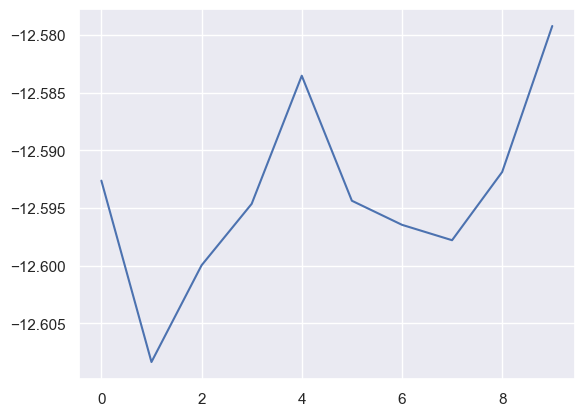

In [1]:
# Import necessary libraries
import os
import gym
from environments.energy_management_env import EnergyManagementEnv

# Import the Agent class from your code


# Import environment registration function
from environments.env_registration import register_env

# Define environment parameters
env_params = {
    'SOC_min': 0.2,
    'SOC_max': 0.8,
    'E': 1000,
    'lambda_val': 0.1,
    'data_path': 'data/Data_input.csv',
    'initial_SOC': 0.5  # Set to None if not using an initial_SOC
}

# Register the custom environment
register_env('EnergyManagement-v0', 'environments.env_registration:environment_creator',{'environment_class': EnergyManagementEnv, **env_params})

from rl_monitoring_utils.vectorized_env_wrapper import VectorizedEnvWrapper
from policies.categorical_policy import CategoricalPolicy
from learning_utils.value_estimator import ValueEstimator
from agents.a2c import A2C
from agents.ppo import PPO
from agents.reinforce import REINFORCE

energy_management = VectorizedEnvWrapper(gym.make("EnergyManagement-v0"), num_envs=8)

categorical = CategoricalPolicy(energy_management, lr=1e-2)
value_estimator = ValueEstimator(energy_management, lr=1e-2)
ppo_agent, totals_ppo = PPO(energy_management, categorical, value_estimator, epochs=10, gamma = 1, T = 720, kl_threshold=1e-1)

In [2]:
from agents.test_agent import test_agent

totals, returns, dones = test_agent(energy_management, ppo_agent, gamma = 1, T = 720,)
totals

[-12.600874704438656]

In [9]:
returns[:][0].sum()/8

-12.600874704438665

In [4]:
sum(dones)

array([1., 1., 1., 1., 1., 1., 1., 1.])